In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


stud_df = pd.ExcelFile('test.xlsx')
table = stud_df.parse('Результаты')
if set(['Unnamed: 0']).issubset(table.columns):
        table.drop('Unnamed: 0', axis = 1, inplace = True)
t_stud = table.copy()



In [2]:
from scipy.stats import truncnorm
#rating_by_students = t_stud.drop(columns = ['Группа','Семестр']).groupby(['Студент (Код)','Дисциплина']).mean().dropna(subset = ['Оценка студента (опрос)']).sort_values(by = ['Студент (Код)','Оценка студента (опрос)'], ascending=False)
#stud_array = tt['Студент (Код)'].unique().tolist()

tt = t_stud.dropna(subset = ['Оценка студента (опрос)'])

flag2 = True

rand_trunc_norm = []
myclip_a = 1
myclip_b = 5
my_mean = 4.8
my_std = 0.6
a = (myclip_a - my_mean) / my_std 
b = (myclip_b - my_mean) / my_std
for u in tt['Группа'].unique().tolist():
    for y in tt['Студент (Код)'].unique().tolist():
        x_stud = tt.loc[(tt['Студент (Код)'] == y) & (tt['Группа'] == u)].sort_values(by = ['Оценка студента (опрос)'], ascending = False)
        
        if len(x_stud) > 0:
            rand_trunc_norm = truncnorm.rvs(a, b, loc = my_mean, scale = my_std, size = len(x_stud))
        else:
            continue
        list_of_rand = []
        
        for j in rand_trunc_norm:
            list_of_rand.append(round(j, 1))

        list_of_rand.sort(reverse=True)
        x_stud['truncnorm'] = list_of_rand

        if flag2 == True:
            flag2 = False
            empty_x_stud = tt.iloc[0:0]
            global_x_stud = pd.concat([x_stud, empty_x_stud])
        else:
            global_x_stud = pd.concat([x_stud, global_x_stud])

In [3]:
global_x_stud

,Дисциплина,Группа,Студент (Код),Семестр,Оценка студента (опрос),truncnorm
15338,24,9,241,4,5.000000,5.0
16391,1,9,241,4,5.000000,5.0
16399,9,9,241,4,5.000000,5.0
16398,8,9,241,4,5.000000,4.9
16397,7,9,241,4,5.000000,4.9
...,...,...,...,...,...,...
887,7,1,3,6,4.000000,4.0
841,2,1,3,6,4.000000,4.0
767,36,1,3,5,4.000000,3.9
1179,49,1,3,7,4.000000,3.8


In [4]:
global_x_stud_round = global_x_stud.copy()
global_x_stud_round['truncnorm'] = round(global_x_stud_round['truncnorm'])
global_x_stud_round

,Дисциплина,Группа,Студент (Код),Семестр,Оценка студента (опрос),truncnorm
15338,24,9,241,4,5.000000,5.0
16391,1,9,241,4,5.000000,5.0
16399,9,9,241,4,5.000000,5.0
16398,8,9,241,4,5.000000,5.0
16397,7,9,241,4,5.000000,5.0
...,...,...,...,...,...,...
887,7,1,3,6,4.000000,4.0
841,2,1,3,6,4.000000,4.0
767,36,1,3,5,4.000000,4.0
1179,49,1,3,7,4.000000,4.0


In [5]:
#global_x_stud.loc[(global_x_stud['Студент (Код)'] == 281) & (global_x_stud['Группа'] == 9) & (global_x_stud['Семестр'] == 1)]

In [6]:
rating_by_students_2 = global_x_stud_round.drop(columns = ['Группа','Семестр', 'Оценка студента (опрос)', 'Студент (Код)']).groupby(['Дисциплина']).mean().sort_values(by = ['truncnorm'], ascending=False)
rating_by_students_2

,truncnorm
Дисциплина,
60,5.0
124,5.0
108,5.0
94,5.0
86,5.0
...,...
110,4.0
109,4.0
27,4.0


In [7]:
rating_by_students_1 = t_stud.dropna(subset = ['Оценка студента (опрос)']).drop(columns = ['Группа','Семестр', 'Студент (Код)']).groupby(['Дисциплина']).mean().sort_values(by = ['Оценка студента (опрос)'], ascending=False)
rating_by_students_1

,Оценка студента (опрос)
Дисциплина,
108,5.000000
100,5.000000
94,5.000000
93,5.000000
90,5.000000
...,...
42,3.625000
106,3.619048
35,3.562500


In [8]:
flag3 = True
for z in global_x_stud['Группа'].unique().tolist():
    for x in global_x_stud['Студент (Код)'].unique().tolist():
        for c in global_x_stud['Семестр'].unique().tolist():
            sem_stud = global_x_stud.loc[(global_x_stud['Студент (Код)'] == x) & (global_x_stud['Группа'] == z) & (global_x_stud['Семестр'] == c)]
            if len(sem_stud) > 0:
                
                list_of_trunc = sem_stud['truncnorm'].tolist()
                list_of_trunc.sort(reverse=True)
                high_numb = list_of_trunc[0]
                raznost = 5 - high_numb
                for i in range(len(list_of_trunc)):
                    abc = list_of_trunc[i] + raznost
                    list_of_trunc[i] = abc
                    if list_of_trunc[i] > 5:
                        list_of_trunc[i] = 5
                sem_stud['truncnorm_new'] = list_of_trunc

                if flag3 == True:
                    flag3 = False
                    empty_x_stud = global_x_stud.iloc[0:0]
                    global_x_stud_new = pd.concat([sem_stud, empty_x_stud])
                else:
                    global_x_stud_new = pd.concat([sem_stud, global_x_stud_new])
            else:
                continue

<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_stud['truncnorm_new'] = list_of_trunc
<ipython-input-8-7f98d3d30cac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [9]:
global_x_stud_new_round = global_x_stud_new.copy()
global_x_stud_new_round['truncnorm_new'] = round(global_x_stud_new_round['truncnorm_new'])
global_x_stud_new_round

,Дисциплина,Группа,Студент (Код),Семестр,Оценка студента (опрос),truncnorm,truncnorm_new
1111,28,1,3,7,5.000000,5.0,5.0
1162,48,1,3,7,4.000000,4.4,4.0
1145,41,1,3,7,4.000000,4.4,4.0
1128,39,1,3,7,4.000000,4.3,4.0
1094,10,1,3,7,4.000000,4.3,4.0
...,...,...,...,...,...,...,...
16407,17,9,241,4,4.900000,3.8,4.0
16406,16,9,241,4,4.800000,3.8,4.0
16400,10,9,241,4,4.700000,3.7,4.0
15631,104,9,241,4,4.333333,3.7,4.0


In [10]:
rating_by_students_3 = global_x_stud_new.drop(columns = ['Группа','Семестр', 'Оценка студента (опрос)', 'Студент (Код)', 'truncnorm']).groupby(['Дисциплина']).mean().sort_values(by = ['truncnorm_new'], ascending=False)
rating_by_students_4 = global_x_stud_new_round.drop(columns = ['Группа','Семестр', 'Оценка студента (опрос)', 'Студент (Код)', 'truncnorm']).groupby(['Дисциплина']).mean().sort_values(by = ['truncnorm_new'], ascending=False)

In [11]:
rating_by_students_3

,truncnorm_new
Дисциплина,
100,5.000000
52,4.940000
94,4.900000
86,4.900000
22,4.900000
...,...
109,4.200000
110,4.190000
16,4.169355


In [12]:
rating_by_students_4

,truncnorm_new
Дисциплина,
60,5.000000
94,5.000000
52,5.000000
22,5.000000
79,5.000000
...,...
71,4.178571
16,4.096774
109,4.000000


In [27]:
def graph_rating(rating_by_students_1):
    rating_ = rating_by_students_1.reset_index()
    
    labels = rating_['Дисциплина'].round(1).to_list()
    men_means = rating_['Оценка студента (опрос)'].round(1).to_list()

    x = np.arange(len(labels)) 
    width = 0.6  

    fig, ax = plt.subplots(figsize=(21,10))
    rects1 = ax.bar(x - width/2, men_means, width, label='Рейтинг дисциплин после заполнения пропусков')


    ax.set(ylabel='Оценка', ylim=(3, 5.5))
    ax.set_title('Рейтинг дисциплин')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_xlabel("Номер дисциплины", labelpad=20, weight='bold', size=12)
    ax.legend()


    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    
    autolabel(rects1)

    fig.tight_layout()

    plt.show()


In [14]:
rating_ = rating_by_students_1.sort_values(by = ['Оценка студента (опрос)'])
rating_

,Оценка студента (опрос)
Дисциплина,
113,3.000000
27,3.000000
35,3.562500
106,3.619048
42,3.625000
...,...
90,5.000000
93,5.000000
94,5.000000


<AxesSubplot:ylabel='Дисциплина'>

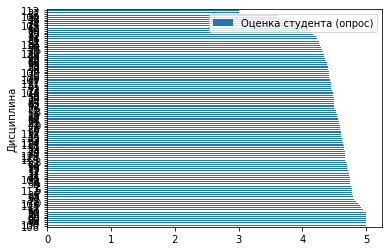

In [16]:
rating_by_students_1.plot(kind='barh')

Text(0, 0.5, 'Номер дисциплины')

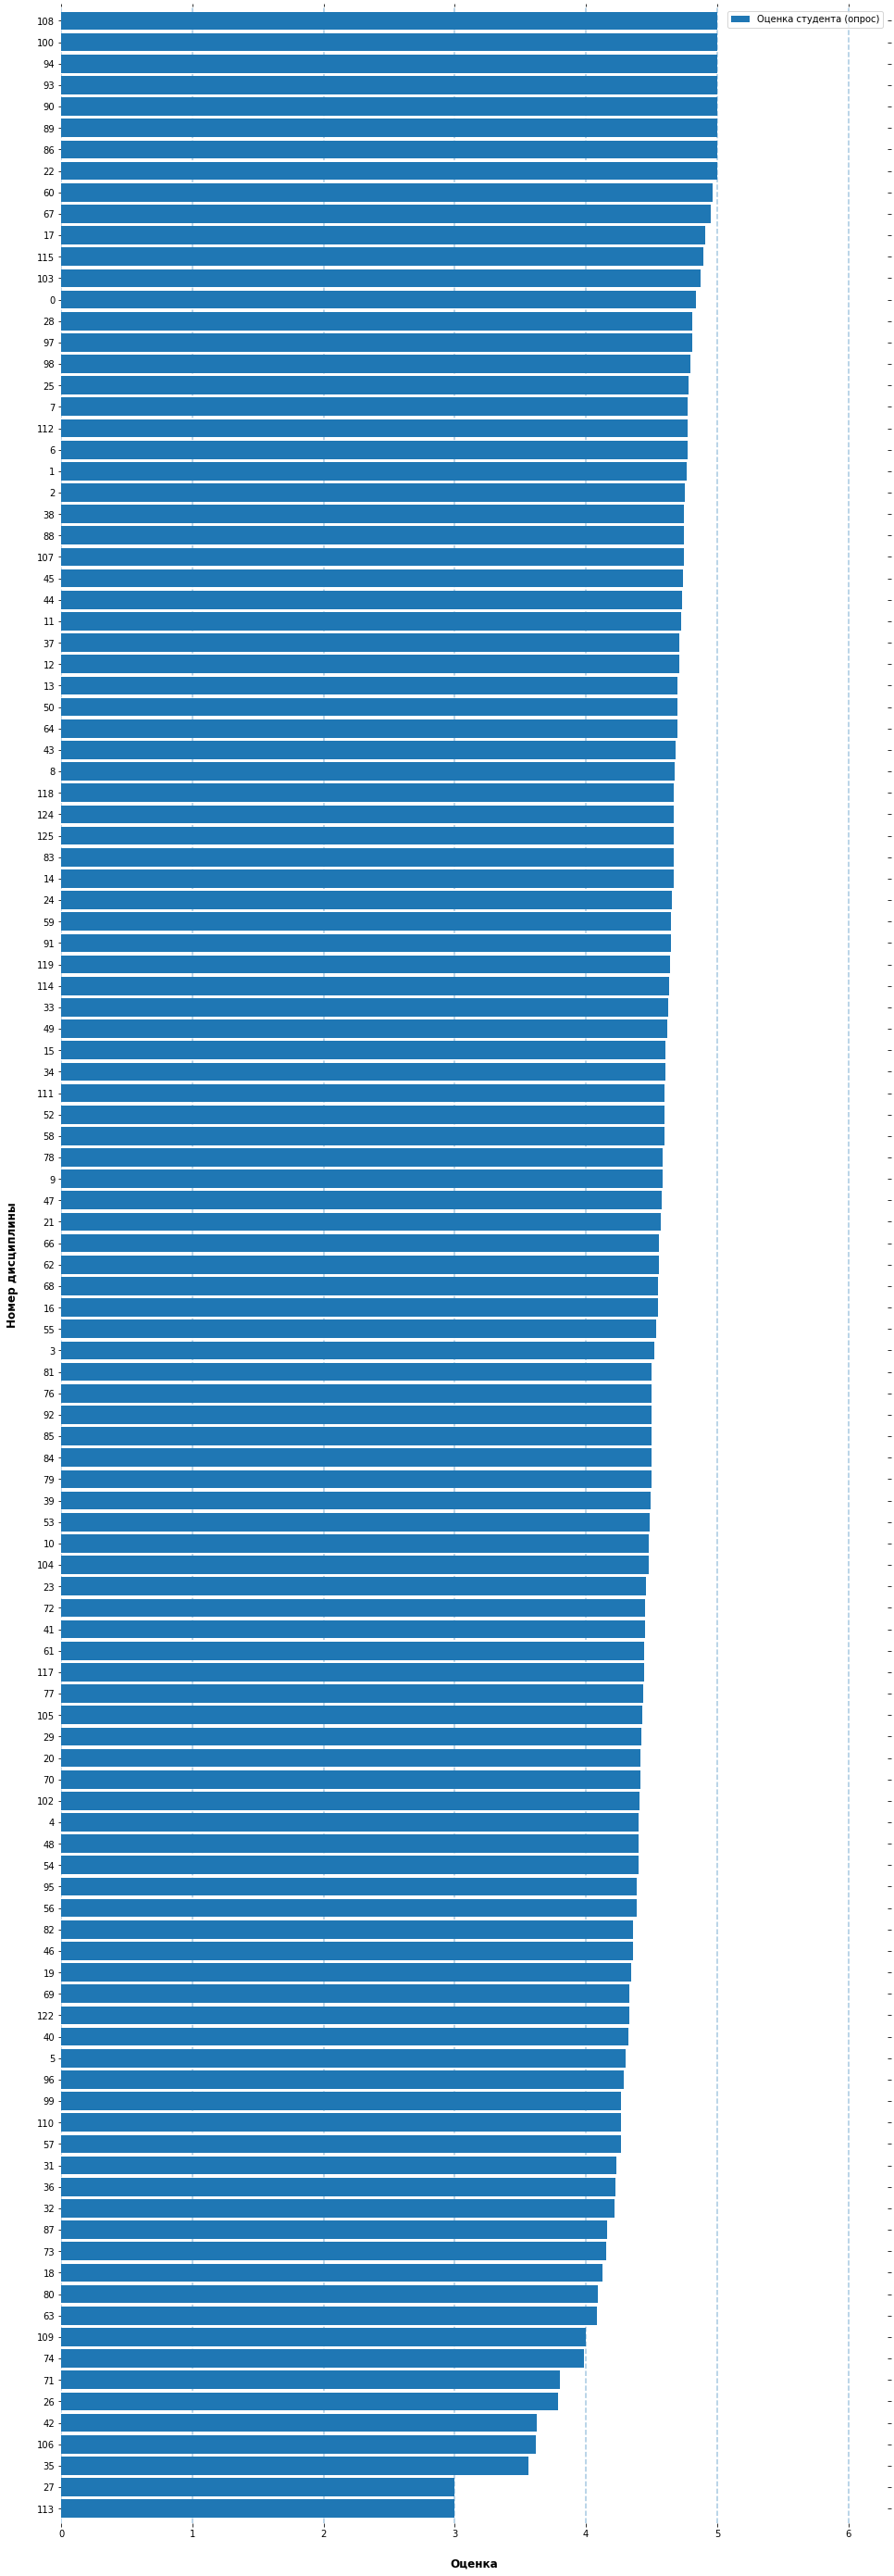

In [17]:
ax = rating_.plot(kind='barh', figsize=(16, 50), zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, zorder=1)

# Set x-axis label
ax.set_xlabel("Оценка", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Номер дисциплины", labelpad=20, weight='bold', size=12)



In [30]:
larg_20 = rating_.nlargest(30, columns = ['Оценка студента (опрос)'])
small_20 = rating_.nsmallest(30, columns = ['Оценка студента (опрос)'])

Text(0, 0.5, 'Номер дисциплины')

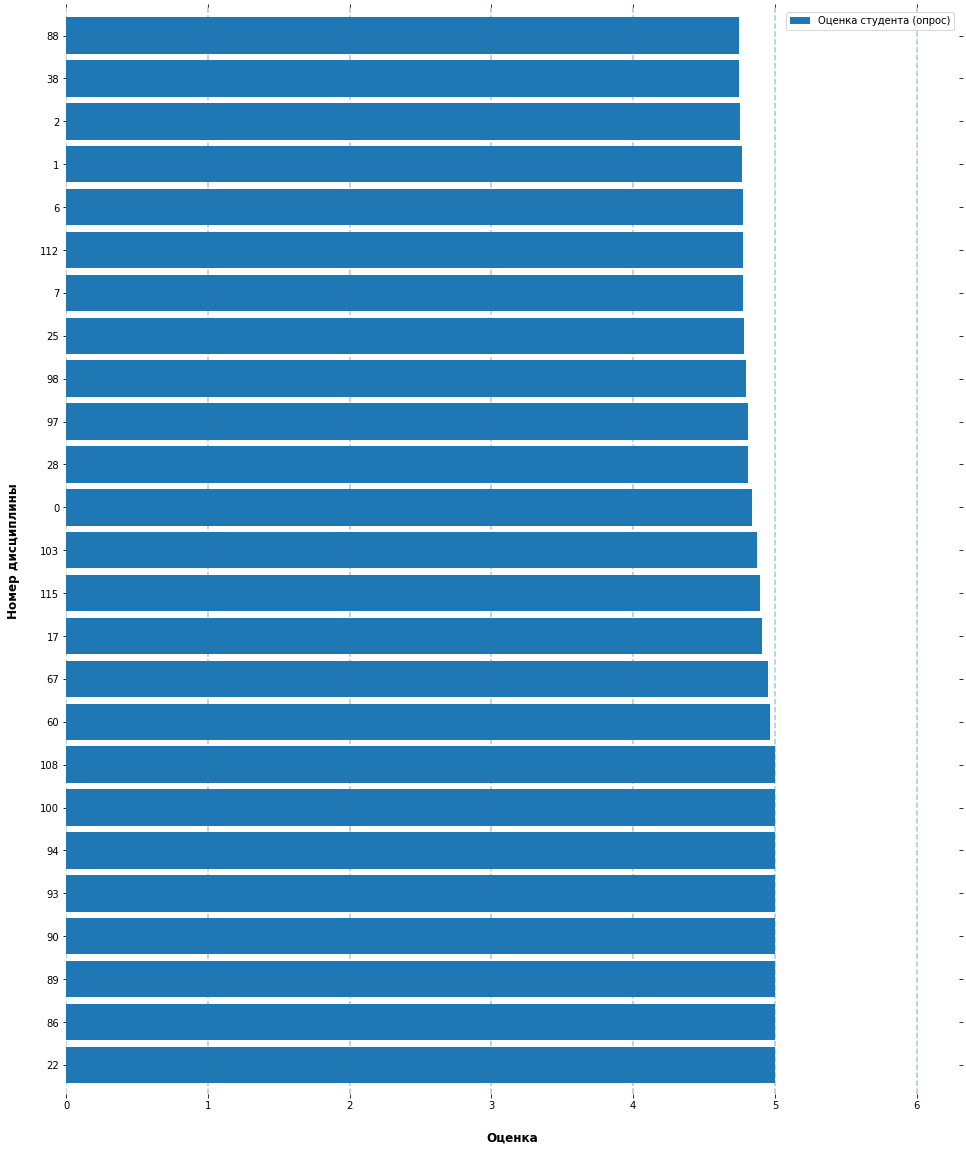

In [19]:
ax = larg_20.plot(kind='barh', figsize=(16, 20), zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, zorder=1)

# Set x-axis label
ax.set_xlabel("Оценка", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Номер дисциплины", labelpad=20, weight='bold', size=12)


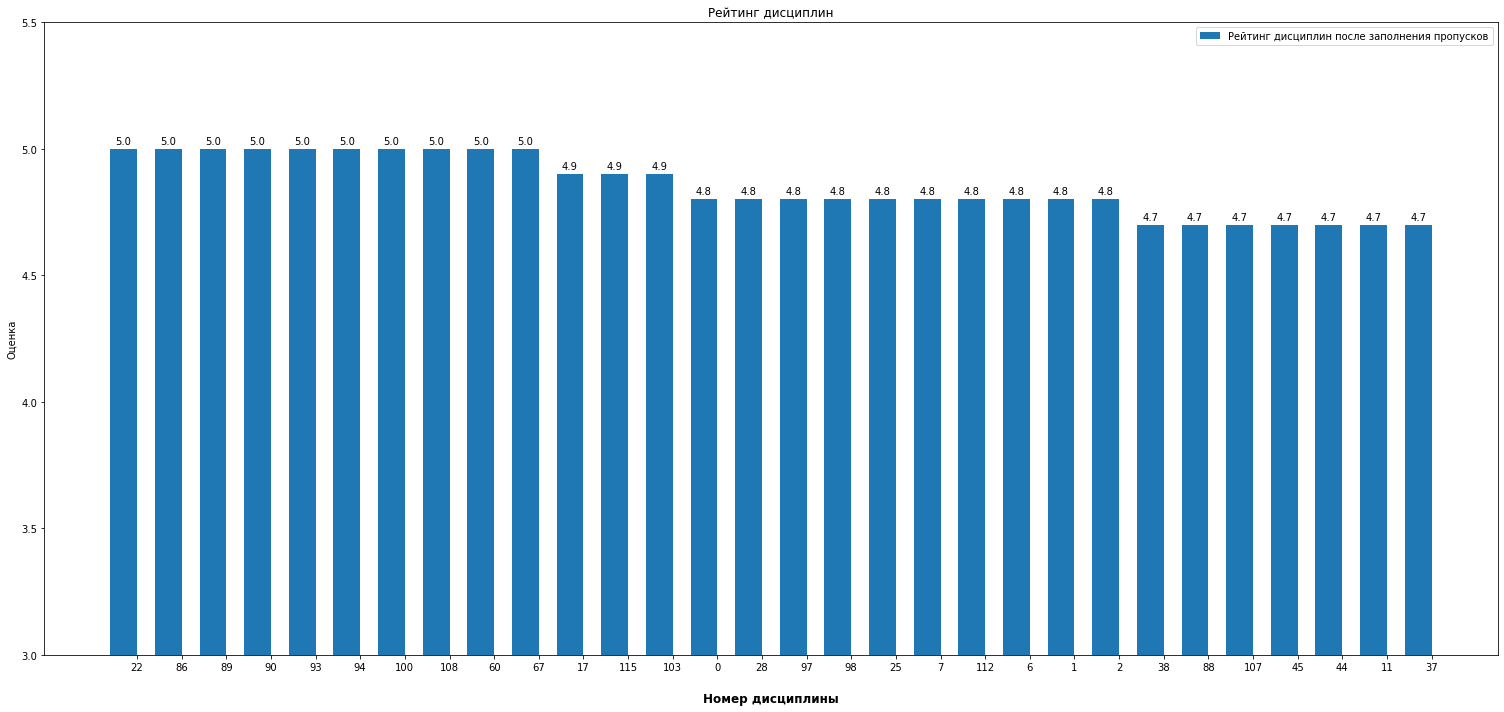

In [29]:
graph_rating(larg_20)

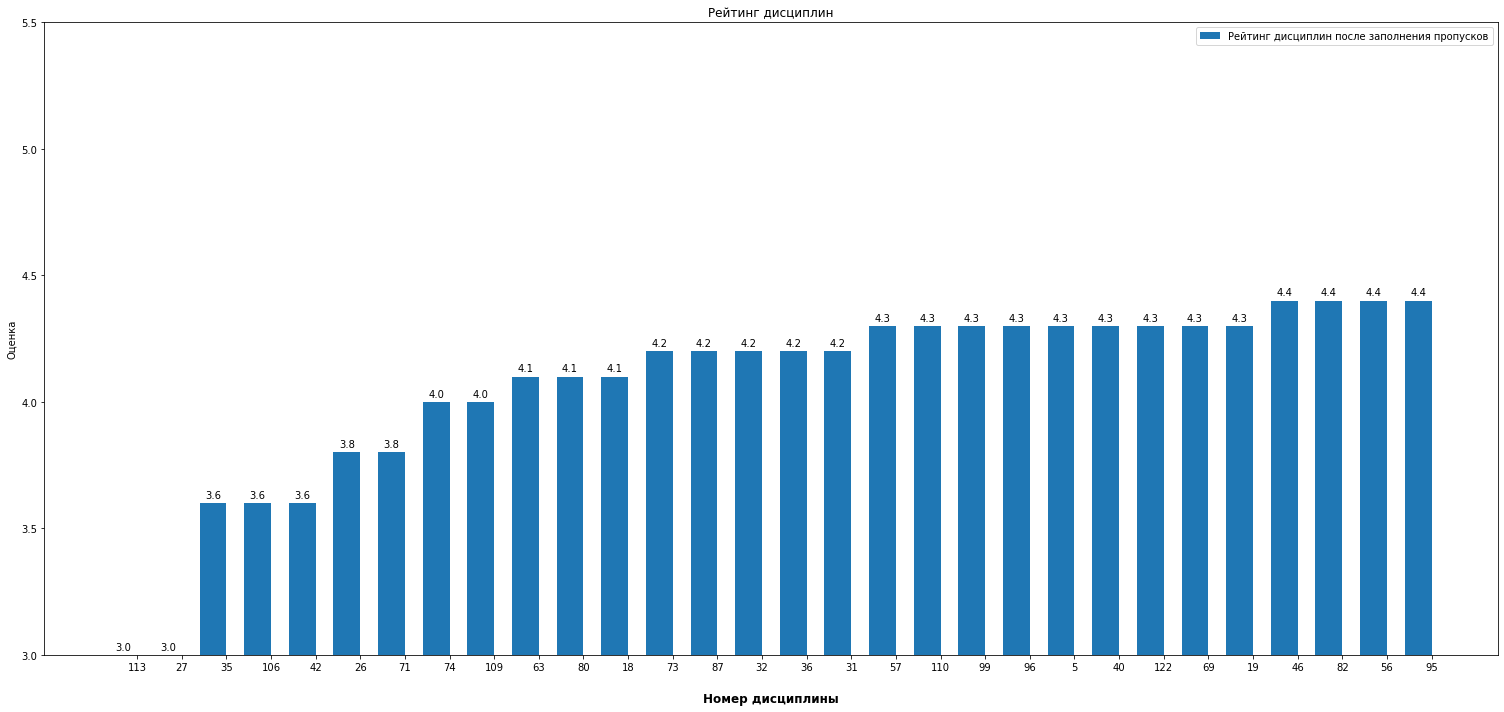

In [31]:
graph_rating(small_20)

In [21]:
global_x_stud_new_round

,Дисциплина,Группа,Студент (Код),Семестр,Оценка студента (опрос),truncnorm,truncnorm_new
1111,28,1,3,7,5.000000,5.0,5.0
1162,48,1,3,7,4.000000,4.4,4.0
1145,41,1,3,7,4.000000,4.4,4.0
1128,39,1,3,7,4.000000,4.3,4.0
1094,10,1,3,7,4.000000,4.3,4.0
...,...,...,...,...,...,...,...
16407,17,9,241,4,4.900000,3.8,4.0
16406,16,9,241,4,4.800000,3.8,4.0
16400,10,9,241,4,4.700000,3.7,4.0
15631,104,9,241,4,4.333333,3.7,4.0


In [22]:
global_x_stud_new_round.loc[(global_x_stud_new_round['Студент (Код)'] == 3) & (global_x_stud_new_round['Группа'] == 1) & (global_x_stud_new_round['Семестр'] == 7)]

,Дисциплина,Группа,Студент (Код),Семестр,Оценка студента (опрос),truncnorm,truncnorm_new
1111,28,1,3,7,5.0,5.0,5.0
1162,48,1,3,7,4.0,4.4,4.0
1145,41,1,3,7,4.0,4.4,4.0
1128,39,1,3,7,4.0,4.3,4.0
1094,10,1,3,7,4.0,4.3,4.0
1077,1,1,3,7,4.0,4.3,4.0
1179,49,1,3,7,4.0,3.8,4.0


In [23]:
rat_2 = rating_by_students_2.reset_index()
rat_2['Ранг дисциплины'] = rat_2['truncnorm'].rank(method='dense', ascending=False)

In [24]:
rat_2

,Дисциплина,truncnorm,Ранг дисциплины
0,60,5.0,1.0
1,124,5.0,1.0
2,108,5.0,1.0
3,94,5.0,1.0
4,86,5.0,1.0
...,...,...,...
112,110,4.0,83.0
113,109,4.0,83.0
114,27,4.0,83.0
115,93,4.0,83.0


In [32]:
rating_by_students_4

,truncnorm_new
Дисциплина,
60,5.000000
94,5.000000
52,5.000000
22,5.000000
79,5.000000
...,...
71,4.178571
16,4.096774
109,4.000000


In [33]:
rating_by_students_2

,truncnorm
Дисциплина,
60,5.0
124,5.0
108,5.0
94,5.0
86,5.0
...,...
110,4.0
109,4.0
27,4.0
